# 📝 A vous (5)

On va faire le plein de graphiques

In [1]:
import pandas as p
import numpy as np

titanic = p.read_csv("../../demo-pandas/titanic.csv")

## Exercices 1

### Exercice 1.1

Affichez dans un diagramme camembert, la répartition des classes parmis les passagers.

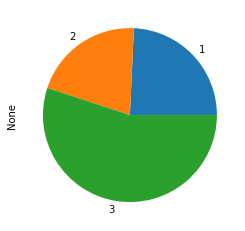

In [2]:
titanic.groupby("Pclass").size().plot.pie();

### Exercice 1.2

Affichez, dans un diagramme de dispersion (nuage de points, scatter), le prix payé pour un ticket par rapport à l'age des passagers.

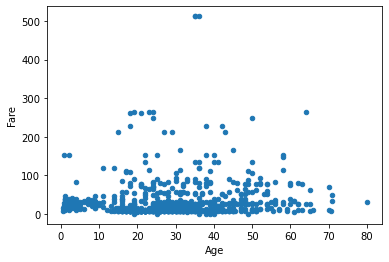

In [3]:
titanic[["Age", "Fare"]].plot.scatter(x = "Age", y = "Fare");

### Exercice 1.3

Affichez la densité des ages des passagers, précisément entre l'age minimal et l'age maximal, avec dix marques à intervalles régulières sur l'abscisse.

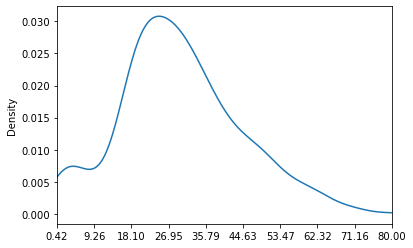

In [4]:
minage = titanic["Age"].min()
maxage = titanic["Age"].max()

titanic["Age"].plot.density(xlim = [minage, maxage], xticks=np.linspace(minage, maxage, 10));

### Exercice 1.4

En supposant que les gens aient embarqués dans l'ordre à Cherbourg, puis à Queenstown, puis à Southampton, et dans l'ordre des classe 3, puis 2 puis 1, affichez un graphique montrant l'évolution du montant total déboursé dans l'achats des tickets.  
(On imagine que les gens ont chacun acheté leurs tickets juste avant de monter)

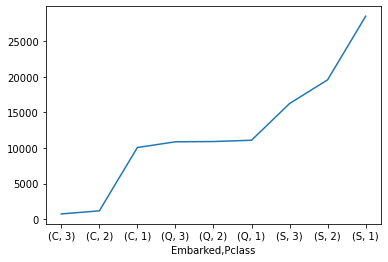

In [5]:
fare_by_embarkment = titanic[["Embarked", "Pclass", "Fare"]].groupby(["Embarked", "Pclass"]).sum()
fare_by_embarkment.sort_values(["Embarked", "Pclass"], ascending=[True, False], inplace=True)
fare_by_embarkment["Cumulated"] = fare_by_embarkment["Fare"].cumsum()

fare_by_embarkment["Cumulated"].plot();

### Exercice 1.5

En partant du graphique précédent, ajoutez une autre courbe qui indique le cumul de gens monté sur le bateau.  
Puisque les deux courbes n'ont pas la même échelle et qu'il n'est pas possible de facilement afficher une double échelle avec pandas, affichez les deux courbes l'une sous l'autre **en partageant leur abscisse** (donc pas deux graphes distincts)

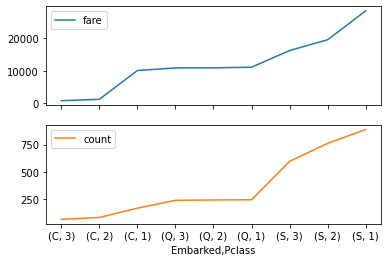

In [6]:
people_by_embarkment = p.DataFrame(titanic[["Embarked", "Pclass"]].groupby(["Embarked", "Pclass"]).size(), columns=["Size"])
people_by_embarkment.sort_values(["Embarked", "Pclass"], ascending=[True, False], inplace=True)

fare_by_embarkment = titanic[["Embarked", "Pclass", "Fare"]].groupby(["Embarked", "Pclass"]).sum()
fare_by_embarkment.sort_values(["Embarked", "Pclass"], ascending=[True, False], inplace=True)

by_embarkment = p.concat([people_by_embarkment.cumsum(), fare_by_embarkment.cumsum()], axis=1)

data = p.DataFrame({
    "fare": by_embarkment["Fare"],
    "count": by_embarkment["Size"]
})

data.plot(subplots=True);

### Exercice 1.6

Affichez un diagramme camembert avec les même valeurs qu'à l'exercice 1.1, et ajoutez un double slider (barre avec deux point pour donner un minimum et un maximum) permettant de filtrer les valeurs par age min et max.

Vous devriez pouvoir dynamiquement choisir une plage d'age et voir le camembert s'ajuster pour vous montrer la proportions de classes.

In [7]:
from ipywidgets import interact, widgets

def by_age_min(age):
    return titanic["Age"] >= age

def by_age_max(age):
    return titanic["Age"] <= age

def f(age_range):
    values = titanic[by_age_min(age_range[0]) & by_age_max(age_range[1])]
    return values.groupby("Pclass").size().plot.pie()

age_widget = widgets.IntRangeSlider(
    value=[0, 80],
    min=0,
    max=80,
    step=1,
    description='Age :',
)

interact(f, age_range = age_widget);

interactive(children=(IntRangeSlider(value=(0, 80), description='Age :', max=80), Output()), _dom_classes=('wi…